$\renewcommand{\ge}{\geqslant}$ $\renewcommand{\le}{\leqslant}$
# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек
---
## Цель работы
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения
*SageMath* — система компьютерной математики с открытым исходным кодом, предоставляющая пользователю возможность работать со многими математическими объектами: от колец и полей до дифференциальных уравнений — с помощью кода на python-подобном языке.

*Jupyter-ноутбук* — файл, который может содержать и отображать изображения, текст в формате markdown, формулы в формате $\TeX{}$ и исполняемый в ноутбуке же код на одном из поддерживаемых языков. Формат jupyter-ноутбуков разработан в рамках проекта Jupyter по созданию бесплатных инструментов с открытым исходным кодом для data science и других компьютерных наук.

Возведение числа в целую степень — очень распространённая операция, в том числе при вычислениях на компьютерах. Очевидно, что умножение числа на себя $n$ раз — неоптимальный путь при расчётах на ЭВМ. Для эффективного возведения чисел в степень используются различные алгоритмы.

*Бинарный метод* — метод, позволяющий свести возведение числа в степень к выполнению двух операций: умножению промежуточного результата на начальное число и возведению очередного результата в квадрат. Показатель степени представляется в виде двоичного числа, и на каждой итерации метода рассматривается очередной бит показателя. Если он равен единице, то показатель степени увеличился на единицу, значит, текущее значение нужно умножить на основание. Также все остальные биты показателя только что были сдвинуты вправо, а значит, степень числа удвоилась, следовательно, текущий результат надо возвести в квадрат.

*m-арный метод* — обобщение бинарного метода, основанное на представлении показателя в виде числа в системе счисления с основанием $m$ и выполнении тех же действий, что и в бинарном методе. Стоит заметить, что при $m>2$ двух операций — возведения очередного результата в степень и умножения очередного результата на основание — недостаточно, так как очередная цифра числа может принимать несколько ненулевых значений. Сдвиг всех цифр влево, соответственно, будет равносилен увеличению показателя степени в $m$ раз.

*Метод множителей* — алгоритм возведения в степень, основанный на представлении показателя степени $n$ в виде произведения $kp$, где $p$ — наименьший простой множитель. Соответственно, $x^n$ вычисляется как $\left( x^p \right)^k$; очередная степень числа вычисляется путём умножения уже известных произведений. 

*Аддитивная цепочка* для числа $n \in \mathbb{N}$ — последовательность чисел $1 = a_0, a_1, \ldots, a_m = n$, для которой верно $a_i = a_j + a_k:$ $\forall k \le j < i, i \in \{1..m\}$. Проще говоря, каждое число аддитивной цепочки, кроме первого, — сумма двух каких-либо предшествующих чисел.

Длина минимальной аддитивной цепочки для числа $n$ обозначается $l(n)$. Это число важно в контексте алгоритмов возведения чисел в натуральную степень, поскольку, очевидно, минимальное количество умножений для возведения числа в степень $n$ равно $l(n)$. Вследствие корректности бинарного метода $l(n) \le \lambda(n) + \nu(n) - 1$, где $\lambda(n)$ — длина двоичной записи числа $n$ без старшего бита, а $\nu(n)$ — количество единичных битов в двоичной записи числа $n$. Вследствие корректности метода множителей также верно $l(m\cdot n) \le l(n)+l(m)$. Эмпирическим путём установлено, что для $n \le 1000$ справедливо:
$$
l(n) = \min\{l(n - 1) + 1, l_n\} - \delta_n \\
l_p= \begin{cases} \infty,\ если\ p -\ простое \\ l(q)+l(^p/_q),\ если\ q -\ минимальный\ простой\ делитель\ p \end{cases}\\
\delta_n \in \{0,1\}
$$
Общая формула для $\delta_n$ не найдена; при $n \le 1000$ $\delta_n = 1$ в 105 случаях.

**_Теорема Брауэра:_** $\exists k < \log_2(\log_2 n):$ $l(n) < (1 + k^{-1})\left\lceil \log_2 n \right\rceil + 2^{k-1} - k + 2$

Поскольку $\lambda(n) = \lfloor \log_2 n \rfloor,$ $k = \lambda\left(\lambda(n)\right) - 2\lambda\left( \lambda\left( \lambda(n) \right) \right)$ удовлетворяет условию теоремы. Положив $k$ таким, получим:

**Следствие:** $\lim\limits_{n \to \infty} \cfrac{l(n)}{\lambda(n)} = 1$

**Следствие:** Наилучшая оценка $l(n)$ сверху: $\lambda(n)\left(1+\cfrac{1}{\lambda(\lambda(n))}+\cfrac{o(\lambda(\lambda(\lambda(n))))}{\lambda(\lambda(n))^2}\right)$

*Звёздная цепочка* — аддитивная цепочка, каждый элемент которой получен сложением предыдущего с каким-то другим элементом цепочки (возможно, с самим собой). Длина минимальной звёздной цепочки для числа $n$ обозначается $l^*(n)$ и, очевидно, не может быть меньше длины минимальной аддитивной цепочки $l(n)$.

*Вектор индексов звёздной цепочки* — последовательность порядковых номеров чисел аддитивной цепочки. Аддитивная цепочка строится по вектору по следующему правилу: на каждом шаге к последнему элементу цепочки прибавляется элемент, индекс которого указан в векторе следующим.

**Алгоритм Брауэра** — приближённый алгоритм вычисления близких к оптимальным аддитивных цепочек, основанный на переводе числа $n$ в систему счисления с основанием $2^k$. Таким образом, $k$ удвоений подряд сдвинут число на один разряд влево, после чего нужно добавить очередную цифру числа в выбранной системе счисления, заполнив появившийся разряд.

**Алгоритм дробления вектора индексов** — точный алгоритм вычисления оптимальных звёздных аддитивных цепочек, основанный на полном переборе возможных вариантов. Вектор индексов цепочки делится на фиксированную часть и изменяющуюся часть. Обе части подбираются перебором. После получения очередной фиксированной части оценивается, лежит ли искомое число между наибольшим и наименьшим числами, которые могут быть получены из всевозможных продолжений полученной цепочки. Если нет, подбор изменяющейся части не происходит.

**_Гипотеза Шольца-Брауэра:_** $\forall n \in \mathbb{N}: l(2^n-1) \le l(n) + n - 1$. Вычислено, что для $n \le 64$ указанное неравенство является равенством. Неравенство же выполняется по меньшей мере для $n < 5784689$. Длина цепочки для чисел вида $2^n - 1$ представляет интерес, поскольку такие числа — в противовес числам вида $2^n$ — являются "плохими": если достигнуто число $2^{n-1}$, удвоение далее использовать нельзя, но увеличить число надо практически вдвое. Если были бы точно известны хорошие оценки для "неудачных" чисел, возможно, их можно было бы в какой-то мере применять и для других чисел.

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать. Порядок выполнения работы:
1. Применить бинарный метод и метод множителей для $x^n$, где $n \ge 30$, для 2-3 значений $n$ (значения $n$ выбираются студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n > 500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n = 1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1 < n \le 10$ на алгоритме дробления вектора индексов. Сделать выводы.
6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

## Выполнение работы

Для выполнения пункта №1 практической работы реализуем функцию `bin_pow()`, возводящую число в целую неотрицательную степень бинарным методом, и функции `mult_pow_lazy()` и `mult_pow()`, выполняющие то же действие методом множителей, но по-разному: первая раскладывает показатель степени на множители единожды, вторая — полностью факторизует показатель степени, применяя метод множителей столько раз, сколько потребуется. Каждая функция, помимо результата, возвращает количество потребовавшихся операций умножения. Последние две функции, кроме основания и показателя степени, принимают указатель на функцию, используемую для непосредственного возведения в степень. В качестве неё используется `bin_pow()`. Код функций и результаты их работы при различных $n$ представлены ниже.

In [14]:
# Degrees to test algorithms (base doesn't matter)
degrees = [31, 32, 45, 51, 60]; base = 13

In [15]:
def bin_pow(base, degree):
    copy = degree
    bits = []
    while copy:
        bits.append(copy & 1)
        copy >>= 1
      
    operations = 0
    result = base
    bits.pop()
    while bits:
        result *= result
        operations += 1
        if bits[-1]:
            result *= base
            operations += 1
        bits.pop()
        
    return (result, operations)

In [16]:
print("Binary method results:\n")
for degree in degrees:
    print(f"Degree: {degree}\nAnswer: {base}^{degree} = {bin_pow(base, degree)[0]}",
          f"Operations: {bin_pow(base, degree)[1]}\n", sep="\n")

Binary method results:

Degree: 31
Answer: 13^31 = 34059943367449284484947168626829637
Operations: 8

Degree: 32
Answer: 13^32 = 442779263776840698304313192148785281
Operations: 5

Degree: 45
Answer: 13^45 = 134106816713249934153658112422086110743809315028093
Operations: 8

Degree: 51
Answer: 13^51 = 647307989872865201422284359961937038113215496061434545237
Operations: 8

Degree: 60
Answer: 13^60 = 6864377172744689378196133203444067624537070830997366604446306636401
Operations: 8



In [17]:
def mult_pow_lazy(base, degree, function):
    divisor = factor(degree)[0][0]
    operations = 0
    result, step_operations = function(base, divisor)
    operations += step_operations
    if divisor != degree:
        result, step_operations = function(result, degree//divisor)
        operations += step_operations
    return result, operations

In [18]:
print("One-factorization multiplier method results:\n")
for degree in degrees:
    print(f"Degree: {degree}\nAnswer: {base}^{degree} = {mult_pow_lazy(base, degree, bin_pow)[0]}",
          f"Operations: {mult_pow_lazy(base, degree, bin_pow)[1]}\n", sep="\n")

One-factorization multiplier method results:

Degree: 31
Answer: 13^31 = 34059943367449284484947168626829637
Operations: 8

Degree: 32
Answer: 13^32 = 442779263776840698304313192148785281
Operations: 5

Degree: 45
Answer: 13^45 = 134106816713249934153658112422086110743809315028093
Operations: 8

Degree: 51
Answer: 13^51 = 647307989872865201422284359961937038113215496061434545237
Operations: 7

Degree: 60
Answer: 13^60 = 6864377172744689378196133203444067624537070830997366604446306636401
Operations: 8



In [19]:
def mult_pow(base, degree, function):
    operations = 0;
    result = base
    for elem in tuple(factor(degree)):
        for i in range(elem[1]):
            result, step_operations = function(result, elem[0])
            operations += step_operations
    
    return result, operations

In [20]:
print("Full-factorization multiplier method results:\n")
for degree in degrees:
    print(f"Degree: {degree}\nAnswer: {base}^{degree} = {mult_pow(base, degree, bin_pow)[0]}",
          f"Operations: {mult_pow(base, degree, bin_pow)[1]}\n", sep="\n")

Full-factorization multiplier method results:

Degree: 31
Answer: 13^31 = 34059943367449284484947168626829637
Operations: 8

Degree: 32
Answer: 13^32 = 442779263776840698304313192148785281
Operations: 5

Degree: 45
Answer: 13^45 = 134106816713249934153658112422086110743809315028093
Operations: 7

Degree: 51
Answer: 13^51 = 647307989872865201422284359961937038113215496061434545237
Operations: 7

Degree: 60
Answer: 13^60 = 6864377172744689378196133203444067624537070830997366604446306636401
Operations: 7



Из распечатанных листингов видно, что для некоторых показателей степени методу множителей потребовалось такое же количество операций, что и бинарному методу. В частности, легко видеть, что при простом $n$ метод множителей вырождается в бинарный, значит, количество операций для обоих методов будет одинаковым. Но для некоторых значений $n$ метод множителей показал лучшие результаты; при этом многократное применение метода множителей для одного возведения в степень обеспечивает в целом меньшее количество операций, чем однократное. Вывод: метод множителей слегка производительнее бинарного метода, но не для любой степени $n$.

Кроме того, в ходе работы было обнаружено, что, если использовать не вполне рациональный алгоритм бинарного возведения в степень, метод множителей будет показывать худшие результаты, чем бинарный. В представленной выше функции возведения числа в степень бинарным методом была использована оптимизация: поскольку известно, что первый значимый бит двоичного числа всегда равен единице, можно пропустить обработку этого бита, начав вычисление сразу с $x^1$. Если этого не учитывать и начинать вычисление с $x^0 = 1$, при каждом вызове функции будут выполняться две лишние операции: возведение единицы в квадрат и умножение единицы на $x$. Тогда вызывать функцию бинарного возведения в степень несколько раз вместо одного может быть невыгодно, что иллюстрирует пример ниже:

In [21]:
def bin_pow_unopt(base, degree):
    copy = degree
    bits = []
    while copy:
        bits.append(copy & 1)
        copy >>= 1
      
    operations = 0
    result = 1
    while bits:
        result *= result
        operations += 1
        if bits[-1]:
            result *= base
            operations += 1
        bits.pop()
        
    return (result, operations)

In [22]:
print("Iterations for binary method: ",
      tuple(bin_pow_unopt(base, degree)[1] for degree in degrees),"\n",
      "Iterations for one-factorization multiplier method: ",
      tuple(mult_pow_lazy(base, degree, bin_pow_unopt)[1] for degree in degrees),"\n",
      "Iterations for full-factorization multiplier method: ",
      tuple(mult_pow(base, degree, bin_pow_unopt)[1] for degree in degrees),
      sep="")

Iterations for binary method: (10, 7, 10, 10, 10)
Iterations for one-factorization multiplier method: (10, 9, 12, 11, 12)
Iterations for full-factorization multiplier method: (10, 15, 13, 11, 15)


Как видно, с увеличением количества вызовов функции `bin_pow_unopt()` количество операций растёт, так что само по себе использование метода множителей не является гарантией большей, чем у бинарного метода, эффективности.

---
В рамках выполнения пункта 2 практической работы была реализована функция `brauer()`, вычисляющая аддитивную цепочку методом Брауэра:

In [23]:
def brauer(n, k):
    digits = []
    q = n
    while q >= 2^k:
        digits.append(q % 2^k)
        q //= 2^k
    digits.append(q)
    if digits == [0]:
        return [0]
    
    chain = []
    
    for i in range(1,2^k):
        chain.append(i)
        
    current = digits[-1]
    digits.pop()
    while digits:
        for i in range(1, k+1):
            chain.append(current << i)
        chain.append(chain[-1] + digits[-1])
        current = chain[-1]
        digits.pop()
        
    return chain
    

In [24]:
test_data = [
             (216, 1), (216, 2), (216, 3), (216, 4),
             (14, 1), (14, 2), (14, 3), (14, 4)
            ]

for elem in test_data:
    print(f"Chain for n = {elem[0]}, k = {elem[1]}:", brauer(elem[0], elem[1]))

Chain for n = 216, k = 1: [1, 2, 3, 6, 6, 12, 13, 26, 27, 54, 54, 108, 108, 216, 216]
Chain for n = 216, k = 2: [1, 2, 3, 6, 12, 13, 26, 52, 54, 108, 216, 216]
Chain for n = 216, k = 3: [1, 2, 3, 4, 5, 6, 7, 6, 12, 24, 27, 54, 108, 216, 216]
Chain for n = 216, k = 4: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 26, 52, 104, 208, 216]
Chain for n = 14, k = 1: [1, 2, 3, 6, 7, 14, 14]
Chain for n = 14, k = 2: [1, 2, 3, 6, 12, 14]
Chain for n = 14, k = 3: [1, 2, 3, 4, 5, 6, 7, 2, 4, 8, 14]
Chain for n = 14, k = 4: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


Сразу видно, что длины полученных аддитивных цепочек для одного и того же числа при разных значениях параметра $k$ различны. Следовательно, все цепочки, кроме самой короткой из полученных, уже не могут быть минимальными. Однако кратчайшая цепочка для $n = 216$ (при $k = 2$) тоже не минимальна: её длина равна $12$, в то время как из оценки $l(n) \le \lambda(n) + \nu(n) - 1$ и равенства $216 = 11011000_2$ следует $l(n) \le 7 + 4 - 1 \Rightarrow l(n) \le 10$. Длина же цепочки для $n = 14$ при $k = 2$ минимальна, согласно табличным данным.

Как видно, длины большинства построенных цепочек значительно превышают длины кратчайших цепочек. Однако некоторыми оптимизациями алгоритма можно добиться сокращения длины итоговых ответов. Самые очевидные оптимизации — вместо всех чисел $1, 2, \ldots, 2^{k}-1$ добавлять в начало цепочки только числа, не превышающие наибольшей цифры числа в системе счисления с основанием $2^k$; пропускать шаги, связанные с добавлением нулей (нулевые цифры числа). Так, для $n=216$ при $k=3$ эти оптимизации сократили бы цепочку сразу на 5 элементов. Однако даже оптимизации не помогут найти минимальную аддитивную цепочку для любого $n$ при любом $k$, поскольку алгоритм является приближённым и находит лишь более или менее близкую к оптимальной цепочку.

---
В рамках выполнения пункта 3 работы была реализована функция, применяющая алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для данного числа. Для удобства работы также был реализован класс, представляющий звёздную цепочку. Код функции и класса с результатами тестирования представлены ниже.

In [25]:
class StarChain:
    def __init__(self, length, prev=[]):
        self.data = prev + list(1 for i in range(1, length + 1))
                
    def switch(self):
        index = -1
        while index > -1*len(self.data):
            if self.data[index] <= len(self.data) + index:
                self.data[index] += 1
                for j in range(1, -1*index):
                    self.data[-j] = 1
                return
            index -= 1
                    
    def count(self, start=1):
        result = [start]
        for elem in self.data:
            result.append(result[-1] + result[elem-1])
        return result 

In [26]:
def index_split(n):
    bin_length = len(bin(n)) - 3
    ones_count = bin(n).count('1')
    for chain_length in range(bin_length, bin_length + ones_count):
        fixed_length = chain_length // 2
        fixed_chain = StarChain(fixed_length)
        for i in range(factorial(fixed_length)):
            last = fixed_chain.count()[-1]
            min_possible = last + (chain_length - fixed_length)
            max_possible = last * 2^(chain_length-fixed_length)
            if n >= min_possible and n <= max_possible:
                chain = StarChain(chain_length - fixed_length, fixed_chain.data)
                for j in range(factorial(chain_length)/factorial(fixed_length)):
                    if chain.count()[-1] == n:
                        return chain.count()
                    chain.switch()
            fixed_chain.switch()

In [30]:
test_val = [1, 2, 3, 4, 7, 13, 14, 27]
for elem in test_val:
    print('n =', elem, ':', index_split(elem))

n = 1 : [1]
n = 2 : [1, 2]
n = 3 : [1, 2, 3]
n = 4 : [1, 2, 4]
n = 7 : [1, 2, 3, 4, 7]
n = 13 : [1, 2, 3, 5, 8, 13]
n = 14 : [1, 2, 3, 4, 7, 14]
n = 27 : [1, 2, 3, 6, 9, 18, 27]


Теперь сравним время нахождения аддитивной цепочки уже реализованными алгоритмами. Поскольку алгоритм дробления вектора индексов осуществляет полный перебор всех допустимых векторов индексов, пока не найдёт подходящий, он имеет факториальную сложность. Следовательно, разумно ожидать, что данный алгоритм будет работать значительно медленнее остальных. Запустим все алгоритмы на одном наборе данных:

In [60]:
test_values = [27, 512, 511]
base = 1
k_values = list(i+1 for i in range(7))

for elem in test_values:
    print(f'n = {elem}')
    
    print('Split algorithm:', timeit('index_split(elem)', repeat=1, number=1))
    
    print('Binary method:', timeit('bin_pow(base, elem)'))
    
    print('One-factorization multiplier method:', timeit('mult_pow_lazy(base, elem, bin_pow)'))
    
    print('Full-factorization multiplier method:', timeit('mult_pow(base, elem, bin_pow)'))
    
    for k in k_values:
        print(f'Brauer method with k = {k}:', timeit('brauer(elem, k)'))

    print('\n')

n = 27
Split algorithm: 1 loops, best of 1: 2.01 ms per loop
Binary method: 625 loops, best of 3: 3.55 μs per loop
One-factorization multiplier method: 625 loops, best of 3: 9.09 μs per loop
Full-factorization multiplier method: 625 loops, best of 3: 10.8 μs per loop
Brauer method with k = 1: 625 loops, best of 3: 7.29 μs per loop
Brauer method with k = 2: 625 loops, best of 3: 4.84 μs per loop
Brauer method with k = 3: 625 loops, best of 3: 3.65 μs per loop
Brauer method with k = 4: 625 loops, best of 3: 3.91 μs per loop
Brauer method with k = 5: 625 loops, best of 3: 2.44 μs per loop
Brauer method with k = 6: 625 loops, best of 3: 3.66 μs per loop
Brauer method with k = 7: 625 loops, best of 3: 6.24 μs per loop


n = 512
Split algorithm: 1 loops, best of 1: 82.5 ms per loop
Binary method: 625 loops, best of 3: 6.23 μs per loop
One-factorization multiplier method: 625 loops, best of 3: 12 μs per loop
Full-factorization multiplier method: 625 loops, best of 3: 18.6 μs per loop
Brauer m

Можно видеть, что даже на сравнительно небольших $n$ алгоритм дробления вектора индексов работает примерно на три порядка медленнее прочих алгоритмов. Для "неудачных" $n > 500$ время работы алгоритма дробления вектора индексов измеряется уже минутами, пока прочие алгоритмы всё так же заканчивают работу за микросекунды. Чемпион по скорости — алгоритм Брауэра с хорошо подобранным параметром $k$. Также весьма быстро работает бинарный метод возведения в степень. Медленнее работают метод Брауэра с неудачно взятым $k$ и метод множителей. Как показано в пункте 1 работы, метод множителей в целом выполняет меньше операций, но накладные расходы на факторизацию и неоднократный вызов функции `bin_pow()` не позволяют обогнать бинарный метод по скорости. Вообще сравнение скоростей приближённых алгоритмов является условным, поскольку, например, бинарный метод действительно возводит число в степень, а метод Брауэра только находит аддитивную цепочку. Однако общие закономерности всё же можно проследить.

Теперь сравним длины полученных разными алгоритмами аддитивных цепочек с учётом того, что количество операций, которое возвращают функции возведения в степень бинарным методом и методом множителей, равно длине вектора индексов, а значит, на единицу меньше длины аддитивной цепочки. Для удобства приводятся оценки длины кратчайшей цепочки. Оценки снизу и сверху `λ(n)` и `λ(n) + ν(n) - 1` относятся к количеству операций, а не к длине аддитивной цепочки, поэтому для оценки минимально возможной длины цепочки нужно увеличивать обе границы на 1.

In [68]:
for n in test_values:
    print(f'n = {n}')
    print(f'λ(n) = {len(bin(n)) - 3}; λ(n) + ν(n) - 1 = {len(bin(n)) - 3 + bin(n).count("1") - 1}')
    
    print('Split algorithm:', len(index_split(n)))
    print('Binary algorithm:', bin_pow(base, n)[1] + 1)
    print('One-factorization multiplier method:', mult_pow_lazy(base, n, bin_pow)[1] + 1)
    print('Full-factorization multiplier method:', mult_pow(base, n, bin_pow)[1] + 1)
    for k in k_values:
        print(f'Brauer method with k = {k}:', len(brauer(n, k)) )
        
    print("\n")

n = 27
λ(n) = 4; λ(n) + ν(n) - 1 = 7
Split algorithm: 7
Binary algorithm: 8
One-factorization multiplier method: 7
Full-factorization multiplier method: 7
Brauer method with k = 1: 9
Brauer method with k = 2: 9
Brauer method with k = 3: 11
Brauer method with k = 4: 20
Brauer method with k = 5: 31
Brauer method with k = 6: 63
Brauer method with k = 7: 127


n = 512
λ(n) = 9; λ(n) + ν(n) - 1 = 9
Split algorithm: 10
Binary algorithm: 10
One-factorization multiplier method: 10
Full-factorization multiplier method: 10
Brauer method with k = 1: 19
Brauer method with k = 2: 15
Brauer method with k = 3: 19
Brauer method with k = 4: 25
Brauer method with k = 5: 37
Brauer method with k = 6: 70
Brauer method with k = 7: 135


n = 511
λ(n) = 8; λ(n) + ν(n) - 1 = 16
Split algorithm: 13
Binary algorithm: 17
One-factorization multiplier method: 13
Full-factorization multiplier method: 13
Brauer method with k = 1: 17
Brauer method with k = 2: 15
Brauer method with k = 3: 15
Brauer method with k = 4: 2

Как видно, в целом соблюдается закономерность: чем медленнее алгоритм, тем короче найденная с его помощью цепочка. Алгоритм дробления вектора индексов является точным, поскольку перебирает все возможные случаи: он находит оптимальную цепочку. Работающие медленнее большинства остальных алгоритмов вариации метода множителей также находят короткие цепочки. Бинарный метод и метод Брауэра — особенно при неоправданно большом $k$ — находят длинные цепочки. Таким образом, использование того или иного алгоритма обусловлено тем, какое соотношение между оптимальностью решения и затраченным временем наиболее приемлемо для пользователя.

---
В рамках выполнения лабораторной работы №4 было проверено утверждение: "$\lim\limits_{n \to \infty} \cfrac{l(n)}{\lambda(n)} = 1$". Информация о значениях $l(n)$ для чисел была взята с сайта http://webhost.services.iit.cnr.it/staff/giovanni.resta/ac/ в виде текстового файла. В работе используется усечённая версия файла, содержащая информацию только о первых 200 числах натурального ряда.

In [40]:
import numpy as np
import pandas as pd
import pylab as plt

df = pd.read_csv('data_chains.txt', delim_whitespace=True, header=None)

log(1.60318781517588⋅x - 1.28760083850293)                  
────────────────────────────────────────── + 2.0439488294143
                  log(2)                                    


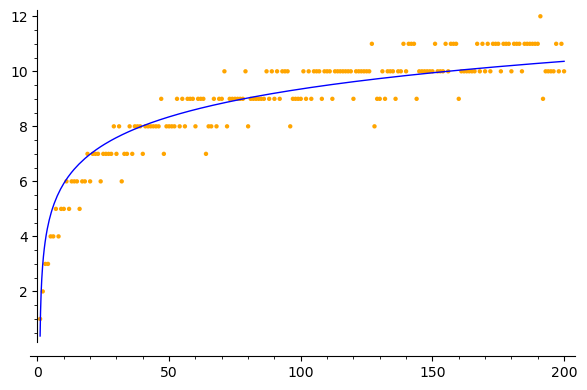

In [43]:
estimation(x,B,C,D) = log(B*x+C,2)+D

data = list(zip(np.array(df[int(0)]), np.array(df[int(1)])))

fig = list_plot(data, color='orange')
# fig.set_legend_options(show_legend=True, axes_labels=('n','l(n)'), legend_font_)

solution = find_fit(data, estimation, variables=[x], parameters=[B, C, D])
coeff = [val.rhs() for val in solution]
function(x) = log(coeff[0]*x + coeff[1], 2) + coeff[2]
print(unicode_art(function))

fig += plot(function, xmin=1, xmax=200, color='blue')
fig.show()


Из полученного графика ясно, что точки вида $(n, l(n))$ хорошо аппроксимизируются логарифмической кривой. Поскольку на бесконечности $\lim\limits_{x \to \infty}\cfrac{\log_2(Bn+C)+D}{\log_2(n)} = \lim\limits_{x \to \infty}\left\{\cfrac{\log_2(B(n+C/B))}{\log_2(n)} + \cfrac{D}{\log_2(n)}\right\} = \lim\limits_{x \to \infty}\left\{ \cfrac{\log_2(B)}{\log_2(n)} + \cfrac{\log_2(n + C/B)}{\log_2(n)} + \cfrac{D}{\log_2(n)} \right\} = 0 + 1 + 0 = 1$, а $\lambda(n) = \lfloor \log_2(n) \rfloor$, то версия о том, что $\lambda(n)$ и $l(n)$ эквивалентны на бесконечности, выглядит весьма правдоподобно.

---
В рамках выполнения пункта 5 работы была написана программа, проверяющая гипотезу Шольца-Брауэра для $1 < n \le 10$, т.е. вычисляющая значения $l(2^n-1)$ и $l(n) + n - 1$ для указанных значений $n$.

In [38]:
for i in range(2, 11):
    k = (2 << (i-1)) - 1
    print(f"n = {i}: l(2^n-1) = l({k}) = {len(index_split(k))} " +
         f"<= {len(index_split(i))+i-1} = l({i})+{i}-1 = l(n)+n-1")

n = 2: l(2^n-1) = l(3) = 3 <= 3 = l(2)+2-1 = l(n)+n-1
n = 3: l(2^n-1) = l(7) = 5 <= 5 = l(3)+3-1 = l(n)+n-1
n = 4: l(2^n-1) = l(15) = 6 <= 6 = l(4)+4-1 = l(n)+n-1
n = 5: l(2^n-1) = l(31) = 8 <= 8 = l(5)+5-1 = l(n)+n-1
n = 6: l(2^n-1) = l(63) = 9 <= 9 = l(6)+6-1 = l(n)+n-1
n = 7: l(2^n-1) = l(127) = 11 <= 11 = l(7)+7-1 = l(n)+n-1
n = 8: l(2^n-1) = l(255) = 11 <= 11 = l(8)+8-1 = l(n)+n-1
n = 9: l(2^n-1) = l(511) = 13 <= 13 = l(9)+9-1 = l(n)+n-1
n = 10: l(2^n-1) = l(1023) = 14 <= 14 = l(10)+10-1 = l(n)+n-1


Как можно видеть, для значений $n$ не больше десяти гипотеза относительно легко проверяется, но в силу того, что точный алгоритм состоит в полном переборе возможных вариантов, это требует заметных временных затрат.

Поскольку для $n \le 64$ неравенство гипотезы Шольца-Брауэра на самом деле является равенством, то для чисел вида $2^n - 1$ при $n \le 64$ можно предусмотреть оптимизацию алгоритма дробления вектора индексов, не производя перебор всех возможных длин, а сразу начиная с длины цепочки $l(n) + n - 1$.

---
В рамках выполнения пункта 6 была реализована оптимизированная версия алгоритма Брауэра. В её основе лежат уже известные наблюдения: в аддитивной цепочке точно не нужны числа, меньшие $2^k$, но при этом большие наибольшей цифры числа; прибавление нуля можно опустить.

Очевидно, что начальная часть аддитивной цепочки может содержать "лишние" числа, даже если числа, большие максимальной цифры числа, не включены в цепочку. Попробовать сильнее сократить цепочку можно, пытаясь получить каждую цифру числа максимально "широкими шагами": удвоением для чётной цифры и сложением $\left\lfloor m/2 \right\rfloor$ и $\left\lfloor m/2 \right\rfloor + 1$ для нечётного $m$. Рекурсивно применив ту же операцию к полученным числам, можем построить короткую цепочку. По достижении уже известного маршрута поиск можно прекратить. Легко видеть, что многие полученные числа на самом деле будут повторяться: $15 = 8 + 7; 8 = \mathbf{4} \cdot 2; 7 = \mathbf{4} + 3, \ldots$, — что позволяет проредить дерево рекурсивных вызовов. На первый взгляд может показаться, что количество обрабатываемых чисел на каждой итерации растёт экспоненциально. Пусть очередное нечётное число равно $2m+1$ (не умаляя общности, будем считать, что $m = 2k$), тогда оно раскладывается на $m$ и $m+1$, а в следующем поколении имеем: из $m$ получаем $k$, из $m+1$ -- $k$ и $k+1$. Одна из веток обрывается как дублирующая. Таким образом, больше трёх веток одновременно существовать не может.

Код и результаты тестирования алгоритма представлены ниже.

In [3]:
def chain(number, lst):
    if number in lst:
        return
    chain(number//2, lst)
    if number % 2 == 1:
        chain((number//2) + 1, lst)
    lst.append(number)

In [14]:
def brauer_mod(n, k):
    digits = []
    q = n
    while q >= 2^k:
        digits.append(q % 2^k)
        q //= 2^k
    digits.append(q)
    if digits == [0]:
        return [0]
    
    result = [1]
    for elem in digits:
        if elem > 1:
            chain(elem, result)
    
    current = digits[-1]
    digits.pop()
    while digits:
        for i in range(1, k+1):
            result.append(current << i)
        if digits[-1]:
            result.append(result[-1] + digits[-1])
        current = result[-1]
        digits.pop()
        
    return result

In [21]:
for elem in test_data:
    lst_brauer = brauer(elem[0], elem[1])
    lst_brauer_mod = brauer_mod(elem[0], elem[1])
    print(f"Chain for n = {elem[0]}, k = {elem[1]}:",
          f"\tBrauer: {lst_brauer} -- chain of length {len(lst_brauer)}",
          f"\tBrauer modification: {lst_brauer_mod} -- chain of length {len(lst_brauer_mod)}",
          sep='\n')

Chain for n = 216, k = 1:
	Brauer: [1, 2, 3, 6, 6, 12, 13, 26, 27, 54, 54, 108, 108, 216, 216] -- chain of length 15
	Brauer modification: [1, 2, 3, 6, 12, 13, 26, 27, 54, 108, 216] -- chain of length 11
Chain for n = 216, k = 2:
	Brauer: [1, 2, 3, 6, 12, 13, 26, 52, 54, 108, 216, 216] -- chain of length 12
	Brauer modification: [1, 2, 3, 6, 12, 13, 26, 52, 54, 108, 216] -- chain of length 11
Chain for n = 216, k = 3:
	Brauer: [1, 2, 3, 4, 5, 6, 7, 6, 12, 24, 27, 54, 108, 216, 216] -- chain of length 15
	Brauer modification: [1, 2, 3, 6, 12, 24, 27, 54, 108, 216] -- chain of length 10
Chain for n = 216, k = 4:
	Brauer: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 26, 52, 104, 208, 216] -- chain of length 20
	Brauer modification: [1, 2, 4, 8, 3, 6, 7, 13, 26, 52, 104, 208, 216] -- chain of length 13
Chain for n = 14, k = 1:
	Brauer: [1, 2, 3, 6, 7, 14, 14] -- chain of length 7
	Brauer modification: [1, 2, 3, 6, 7, 14] -- chain of length 6
Chain for n = 14, k = 2:
	Brauer: [1, 2, 

Попробуем грубо оценить количество операций на дополнительные действия. На составление цепочки для числа меньше $k$ делением пополам должно уйти $O(\log_2 k)$ вызовов функции `chain()`. Цифр в числе порядка $O(\log_{2^k} n)$. Проверка вхождения элемента в список занимает линейное время относительно количества элементов в нём, то есть порядка количества вызовов рекурсивной функции для каждой цифры: $O(\log k \log n)$. Вместе для всех цифр выходит $O\left((\log k \log n)^2\right)$. Отказ от прибавления нуля не увеличивает асимптотическую сложность алгоритма.

Если считать $k$ малым, а $n$ — большим, асимптотическая сложность алгоритма увеличивается за счёт изменения: сложность основного — самого затратного — цикла оригинального алгоритма равна $O(k \log n)$.

Но, несмотря на падение эффективности, в некоторых случаях алгоритм строит заметно меньшие цепочки — в основном за счёт начала. Если каждое возведение в степень по какой-либо причине обходится дорого, но не настолько, чтобы искать полностью оптимальную аддитивную цепочку, можно с помощью данной модификации слегка сэкономить путём сокращения начала цепочки и исключения прибавлений нуля.

---
## Выводы

В ходе работы были изучены и реализованы различные алгоритмы возведения в степень и алгоритмы построения аддитивных цепочек. Поскольку по аддитивной цепочке для числа $n$ можно построить последовательность умножений, превращающую $x$ в $x^n$, алгоритмы построения аддитивных цепочек тесно связаны с возведением в степень. По результатам анализа изученных методов можно сказать: как правило, чем ближе аддитивная цепочка к оптимальной, тем больше вычислительных затрат требуется на её нахождение. Соответственно, при выборе алгоритма нужно принимать во внимание желаемое соотношение длины цепочки и ресурсов, затраченных на её поиск.